# RYAN SLATTERY: BATTLESHIP AI
### STARTED: FEBRUARY 2023
### VERSION 1

In [1]:
# LIBRARIES
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A DICTIONARY OF ALL SHIPS THAT WILL BE CONSIDERED. FOR NOW, WE WILL ONLY FOCUS ON THE CARRIER OF LENGTH 5.
ships = {"Carrier": 5, "Battleship": 4, "Destroyer": 3, "Submarine": 3, "Patrol": 2}

# PROBABILITY BOARDS FUNCTION (VERSION 1)
#
# DESCRIPTION:
# THIS FUNCTION WILL BE USED TO GENERATE A PROBABILITY BOARD TO HELP US FIND WHERE A SHIP OF LENGTH 5 IS! INSTEAD
# OF RELYING ON RANDOM GUESSES, THIS BOARD WILL GIVE US A ROUGH IDEA OF THE SPACES WHERE THIS SHIP MOST LIKELY
# COULD BE. ON TOP OF THAT, THE PROBABILITIES WILL CONSTANTLY UPDATE GIVEN EACH GUESS!
#
# TO GENERATE THE PROBABILITIES, EVERY SINGLE POSSIBLE PLACEMENT OF THE SHIP IS TAKEN INTO ACCOUNT (AT EVERY
# POSSIBLE SPACE, HORIZONTALLY OR VERTICALLY). THIS WILL REQUIRE SOME COMPUTATION.
#
# I DECIDED TO MAKE THE "positions" VARIABLE A ONE-HOT ENCODED VARIABLE (THIS SAVES US FROM WRITING EXTRA CODE
# USING "if" STATEMENTS, AS THE ONE-HOT VECTORS CAN BE USED MATHEMATICALLY IN THE PLACEMENT OF THE SHIPS)
#
# INPUT: ship_length (INT; LENGTH OF GIVEN SHIP)
# OUTPUT: prob_boards (2D ARRAY; PROBABILITY FOR EACH SPACE ON THE BOARD GIVEN THE SHIP LENGTHS & PLACEMENTS. 
# THIS PROBBILITY TAKES EVERY POSSIBLE SHIP PLACEMENT INTO CONSIDERATION), boards_set (ARRAY OF LISTS; THIS STORES
# ALL POSSIBLE SHIP PLACEMENTS ON THE BOARD IN A 1D FORMAT)
'''def Probability_Boards(ship_length):
    boards_set = []
    prob_boards = np.zeros((10, 10))
    positions = [[1, 0], [0, 1]]
        
    for pos in positions:
        for j in range(10 - (pos[0] * (ship_length - 1))):
            for k in range(10 - (pos[1] * (ship_length - 1))):
                board = np.zeros((10, 10))
                board[j:j + ((ship_length - 1) * pos[0]) + 1, k:k + ((ship_length - 1) * pos[1]) + 1] += 1
                prob_boards += board
                boards_set.append(list(board.flatten()))
        
    return (prob_boards / np.sum(prob_boards)).flatten(), np.array(boards_set)'''


# PROBABILITY BOARDS FUNCTION (VERSION 2)
#
# IMPROVEMENTS:
# INSTEAD OF USING ONE-HOT ENCODED VARIABLES AND 3 (YES, 3!!!) FOR LOOPS, THIS ONE ONLY USES TWO FOR LOOPS AND
# TRANSPOSES THE BOARD TO GET THE OTHER SHIP CONFIGURATION. A SIGNIFICANT IMPROVEMENT FROM O(N^3) TO O(N^2)!
#
# INPUT: ship_length (INT; LENGTH OF GIVEN SHIP)
# OUTPUT: prob_boards (2D ARRAY; PROBABILITY FOR EACH SPACE ON THE BOARD GIVEN THE SHIP LENGTHS & PLACEMENTS. 
# THIS PROBBILITY TAKES EVERY POSSIBLE SHIP PLACEMENT INTO CONSIDERATION), boards_set (ARRAY OF LISTS; THIS STORES
# ALL POSSIBLE SHIP PLACEMENTS ON THE BOARD IN A 1D FORMAT)
def Probability_Boards(ship_length):
    boards_set = []
    prob_boards = np.zeros((10, 10)) 
    
    for i in range(10):
        for j in range(10 - (ship_length - 1)):
            board1 = np.zeros((10, 10))
            board1[i, j:j + ship_length] = 1
            board2 = board1.T
            prob_boards += board1 + board2
            boards_set.append(list(board1.flatten()))
            boards_set.append(list(board2.flatten()))
        
    return (prob_boards / np.sum(prob_boards)).flatten(), np.array(boards_set)
        

prob_boards, boards_set = Probability_Boards(5)

# PLAY FUNCTION
#
# DESCRIPTION: 
# THIS FUNCTION SIMULATES A "HALF" GAME OF BATTLESHIP THROUGH THE ALGORITHM GUESSING (I SAY HALF-GAME AS THERE IS 
# NO SECOND PLAYER OR SECOND BOARD WHERE THE CPU CAN POTENTIALLY LOSE. IT JUST GUESSES).
# 
# INPUT: board (2D ARRAY; THE GIVEN BOARD WHICH THE GAME MUST SOLVE), prob_board (2D ARRAY; PROBABILITY FOR EACH 
# SPACE ON THE BOARD GIVEN THE SHIP LENGTHS & PLACEMENTS. THIS PROBBILITY TAKES EVERY POSSIBLE SHIP PLACEMENT INTO 
# CONSIDERATION AND WILL BE UPDATED FOR EACH ITERATION), board_sets (ARRAY OF LISTS; THIS STORES ALL POSSIBLE SHIP 
# PLACEMENTS ON THE BOARD IN A 1D FORMAT. THIS LIST WILL BE UPDATED FOR EACH GUESS TAKEN)
# OUTPUT: num_guesses (INT; THE NUMBER OF GUESSES FOR A GIVEN GAME. THE LOWER THE NUMBER, THE BETTER!)
def Play(board, prob_board, board_sets):
    num_guesses = 0
    board = board.flatten()
    hit_list = []
    
    while(len(hit_list) < np.sum(board)):
        guess = int(np.random.choice(100, 1, p = prob_board))
        
        if (board[guess] == 1):
            hit_list.append(guess)
            num_guesses += 1
            if (len(hit_list) == 5):
                break
            board_sets = board_sets[np.where(board_sets[:, guess] == 1)]
            prob_board = np.sum(board_sets, axis = 0)
            prob_board[hit_list] = 0
            prob_board = prob_board / np.sum(prob_board)
        else:
            board_sets = board_sets[np.where(board_sets[:, guess] == 0)]
            board_sets[:, hit_list] = 0
            prob_board = np.sum(board_sets, axis = 0)
            prob_board = prob_board / np.sum(prob_board)
            prob_board[hit_list] = 0
            num_guesses += 1
                    
    return num_guesses

In [3]:
# SOME STATISTICS...
test_board = np.zeros((10, 10))
test_board[1:6, 0] = 1
guesses = []

for i in range(10000):
    guesses.append(Play(test_board, prob_boards, boards_set))

print("AVERAGE NUMBER OF GUESSES:", np.mean(guesses))
print("MAXIMUM NUMBER OF GUESSES:", np.max(guesses))
print("MINIMUM NUMBER OF GUESSES:", np.min(guesses))

AVERAGE NUMBER OF GUESSES: 18.8611
MAXIMUM NUMBER OF GUESSES: 43
MINIMUM NUMBER OF GUESSES: 5


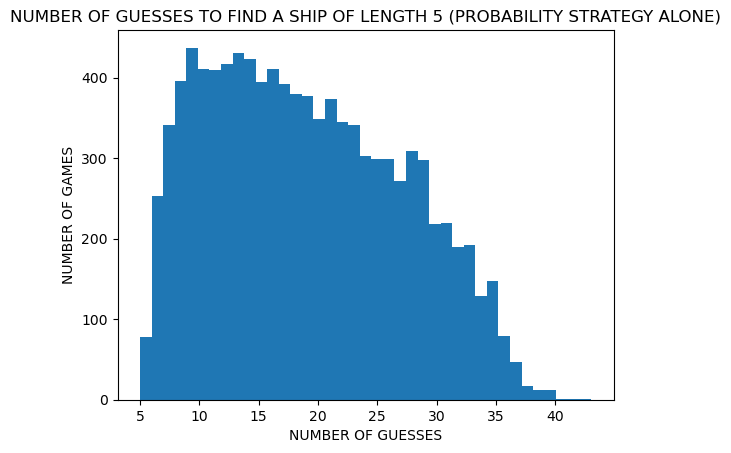

In [4]:
# WE'LL GENERATE A HISTOGRAM TO VISUALIZE THE DATA ON HOW MANY GUESSES IT TAKES TO FIND THIS SHIP, BASED ON THE
# GUESSING STRATEGY.
plt.hist(guesses, bins = len(set(guesses)))
plt.title("NUMBER OF GUESSES TO FIND A SHIP OF LENGTH 5 (PROBABILITY STRATEGY ALONE)")
plt.xlabel("NUMBER OF GUESSES")
plt.ylabel("NUMBER OF GAMES")
plt.show()

In [5]:
# LET'S TEST OUT THE BEST WAY TO SECURE AT LEAST 1 HIT ON A 5x5 GAMEBOARD. IF WE GUESS ALONG ONE AXIS, WE MAY BE
# GUARANTEED A HIT!
def battleship_spatial_test1(sb, ga):
    # HIT & GUESS COUNTERS
    num_hits = 0
    num_guesses = 0

    # GENERATING A LIST OF POSSIBLE GUESSES
    possible_guesses = [0, 1, 2, 3, 4]

    # GUESSING...
    while(num_hits < 1):
        guess = np.random.choice(possible_guesses)

        if (sb[guess, ga] == 0):
            sb[guess, ga] = -1
            possible_guesses.remove(guess)
            num_guesses += 1
        elif (sb[guess, ga] == 1):
            sb[guess, ga] = -1
            num_guesses += 1
            num_hits += 1
            print("FOUND THE SHIP IN", num_guesses, "GUESSES!")
        
        if (len(possible_guesses) == 0):
            print("EXHAUSTED GUESSES")
            break

    return sb, num_guesses

# WE WILL RUN THIS 20 TIMES TO GET A GOOD DISTRIBUTION OF THE NUMBER OF GUESSES
# GENERATING AN EMPTY LIST
total_guesses = []

# RUNNING THE TEST 20 TIMES
for i in range(20):
    # GENERATING A SAMPLE BOARD (5x5) AND PLACING A SHIP OF LENGTH 5 ON THE HORIZONTAL AXIS AT X = 3
    sample_board = np.zeros((5, 5))
    sample_board[3] = 1

    # GUESSING A VARIABLE ALONG THE VERTICAL AXIS (Y = 2)
    guess_axis = 2
    
    gen_board, total_guess = battleship_spatial_test1(sample_board, guess_axis)
    total_guesses.append(total_guess)

print("BEST CASE SCENARIO:", min(total_guesses))
print("WORST CASE SCENARIO:", max(total_guesses))

FOUND THE SHIP IN 5 GUESSES!
FOUND THE SHIP IN 4 GUESSES!
FOUND THE SHIP IN 5 GUESSES!
FOUND THE SHIP IN 2 GUESSES!
FOUND THE SHIP IN 3 GUESSES!
FOUND THE SHIP IN 5 GUESSES!
FOUND THE SHIP IN 2 GUESSES!
FOUND THE SHIP IN 3 GUESSES!
FOUND THE SHIP IN 2 GUESSES!
FOUND THE SHIP IN 1 GUESSES!
FOUND THE SHIP IN 3 GUESSES!
FOUND THE SHIP IN 3 GUESSES!
FOUND THE SHIP IN 4 GUESSES!
FOUND THE SHIP IN 5 GUESSES!
FOUND THE SHIP IN 5 GUESSES!
FOUND THE SHIP IN 5 GUESSES!
FOUND THE SHIP IN 1 GUESSES!
FOUND THE SHIP IN 2 GUESSES!
FOUND THE SHIP IN 5 GUESSES!
FOUND THE SHIP IN 4 GUESSES!
BEST CASE SCENARIO: 1
WORST CASE SCENARIO: 5


**WE SEE HERE THAT THE SAMPLE BOARD HAS A SHIP PLACED HORIZONTALLY AT X = 3. IF WE TAKE GUESSES ALONG THE Y-AXIS, WE ARE GUARANTEED TO SCORE A HIT! THE BEST CASE SCENARIO IS HITTING THE SHIP ON THE FIRST GUESS, AND THE WORST CASE SCENARIO IS HITTING IT ON THE FIFTH GUESS. BUT, WHAT IF WE WERE TO PLACE THE SHIP VERTICALLY ON Y = 3 THIS TIME?**

In [6]:
# PLACING THE SHIP VERTICALLY
sample_board = np.zeros((5, 5))
sample_board[3] = 1
sample_board = sample_board.T

gen_board, total_guess = battleship_spatial_test1(sample_board, guess_axis)
print(gen_board)

EXHAUSTED GUESSES
[[ 0.  0. -1.  1.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0. -1.  1.  0.]
 [ 0.  0. -1.  1.  0.]]


**WE COMPLETELY MISSED THE SHIP IN 5 GUESSES, MEANING IT WILL TAKE MORE THAN 5 GUESSES TO HIT THE SHIP IF THE AXIS WE GUESS ON IS INCORRECT! IF WE STARTED TO GUESS ALONG THE HORIZONTAL AXIS AFTER MISSING ON THE VERTICAL AXIS, THE TOTAL NUMBER OF GUESSES IN THE BEST CASE WOULD BE 6, AND THE WORST CASE WOULD BE 9. INSTEAD OF THINKING IN 1D SPACE, MAYBE WE SHOULD THINK IN 2D SPACE... BY THIS, I MEAN IF WE GUESS ALONG THE DIAGONAL OF THE BOARD, WE CAN GUARANTEE OURSELVES ONE HIT REGARDLESS OF WHAT AXIS THE SHIP IS ON!**

In [7]:
def battleship_spatial_test2(sb):
    # HIT & GUESS COUNTERS
    num_hits = 0
    num_guesses = 0

    # GENERATING A LIST OF POSSIBLE GUESSES
    possible_guesses = [0, 1, 2, 3, 4]

    # GUESSING...
    while(num_hits < 1):
        guess = np.random.choice(possible_guesses)

        if (sb[guess, guess] == 0):
            sb[guess, guess] = -1
            possible_guesses.remove(guess)
            num_guesses += 1
        elif (sb[guess, guess] == 1):
            sb[guess, guess] = -1
            num_guesses += 1
            num_hits += 1
            print("FOUND THE SHIP IN", num_guesses, "GUESSES!")
        
        if (len(possible_guesses) == 0):
            print("EXHAUSTED GUESSES")
            break

    return sb, num_guesses

# TESTING
sample_board = np.zeros((5, 5))
sample_board[3] = 1

gen_board, total_guess = battleship_spatial_test2(sample_board)
print(gen_board)

FOUND THE SHIP IN 1 GUESSES!
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1. -1.  1.]
 [ 0.  0.  0.  0.  0.]]


**SO, HOW DO WE DO THIS ON A 10x10 GRID? THIS GIVES US TWO CHOICES...** 

In [8]:
# THE FIRST BOARD CHOICE: 
board1 = np.zeros((10, 10))
board1[4:6] = 1
board1 = board1.T
board1[4:6] = 1
print("BOARD CHOICE 1")
print(board1)
print("TOTAL GUESSES FOR THE FIRST HIT (WORST CASE):", np.sum(board1), '\n')

# A MORE OPTIMIZED FIRST BOARD:
board1[4:6, 4:6] = 0
print("BOARD CHOICE 1 (OPTIMIZED)")
print(board1)
print("TOTAL GUESSES FOR THE FIRST HIT (WORST CASE):", np.sum(board1), '\n')

# THE SECOND BOARD CHOICE:
board2 = np.zeros((10, 10))
board2[0:10, 0:10] = np.identity(10)
board2[5:10, 0:5] = np.identity(5)
board2[0:5, 5:10] = np.identity(5)
print("BOARD CHOICE 2")
print(board2)
print("TOTAL GUESSES FOR THE FIRST HIT (WORST CASE):", np.sum(board2), '\n')

BOARD CHOICE 1
[[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]
TOTAL GUESSES FOR THE FIRST HIT (WORST CASE): 36.0 

BOARD CHOICE 1 (OPTIMIZED)
[[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]
TOTAL GUESSES FOR THE FIRST HIT (WORST CASE): 32.0 

BOARD CHOICE 2
[[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0.

**WE CAN SEE THAT FOR BOARD CHOICE 1 (OPTIMIZED) THE WORST CASE FOR GUESSING IS 32, WHILE THE WORST CASE FOR BOARD CHOICE 2 IS 20. IT'S A NO-BRAINER TO GO WITH BOARD CHOICE 2, AS WE CAN FIGURE OUT MORE INFORMATION ABOUT WHERE THE SHIP IS WITH LESS GUESSES. SO, LET'S ADJUST THE PROBABILITIES GIVEN THIS INFORMATION**

In [9]:
# CONSTRUCTING THE INFORMATION FOR ALL POSSIBLE BOARD CONFIGURATIONS OF LENGTH 5
prob_board5, board_set5 = Probability_Boards(5)
number_boards = np.reshape(np.sum(board_set5, axis = 0), (10, 10))

# CONSTRUCTING A REDEFINED BOARD (MULTIPLY THE NUMBER BOARD BY THE GUESSING TEMPLATE (BOARD CHOICE 2))
# SINCE BOARD CHOICE 2 IS JUST A SET OF 1s AND 0s, THE VALUES THAT WILL BE FOCUSED ON ARE THE ONES THAT
# CORRESPOND TO THE POSITION OF THE 1s, WHILE THE OTHER VALUES WILL BE NULLIFIED THROUGH MULTIPLYING BY 0.
redefined_board = number_boards * board2
print(redefined_board, '\n')

# REDEFINING THE PROBABILITY BOARD
redefined_probability_board = redefined_board / np.sum(redefined_board)

# PLACING A SHIP ON A TEST BOARD
test_board = np.zeros((10, 10))
test_board[1:6, 0] += 1

# DEFINING A NEW PLAY FUNCTION
# PLAY2
# 
# DESCRIPTION: 
# SIMULATES A ONE-WAY GAME OF BATTLESHIP.
#
# IMPROVEMENTS: THIS FUNCTION SADLY REQUIRES MORE LINES OF CODE AND A FEW MORE LINES OF COMPUTATION TO TAKE A 
# SEPARATE CASE INTO CONSIDERATION. HOWEVER, IT IS ABLE TO WIN THE GAME IN A SIGNIFICANTLY MORE EFFICIENT WAY.
#
# INPUT: board (2D ARRAY; THE GIVEN BOARD WHICH THE GAME MUST SOLVE), prob_board (2D ARRAY; PROBABILITY FOR EACH 
# SPACE ON THE BOARD GIVEN THE SHIP LENGTHS & PLACEMENTS. THIS PROBBILITY TAKES EVERY POSSIBLE SHIP PLACEMENT INTO 
# CONSIDERATION AND WILL BE UPDATED FOR EACH ITERATION), board_sets (ARRAY OF LISTS; THIS STORES ALL POSSIBLE SHIP 
# PLACEMENTS ON THE BOARD IN A 1D FORMAT. THIS LIST WILL BE UPDATED FOR EACH GUESS TAKEN), board_template (2D ARRAY;
# A CONFIGURATION FOR GUESSING BASED ON LENGTH)
# OUTPUT: 
def Play2(board, prob_board, board_sets, board_template):
    num_guesses = 0
    board = board.flatten()
    hit_list = []
    
    while(len(hit_list) < np.sum(board)):
        guess = int(np.random.choice(100, 1, p = np.ravel(prob_board)))
        #print(guess)
        
        if (board[guess] == 1):
            hit_list.append(guess)
            num_guesses += 1
            if (len(hit_list) == 5):
                break
            board_sets = board_sets[np.where(board_sets[:, guess] == 1)]
            prob_board = np.sum(board_sets, axis = 0)
            prob_board[hit_list] = 0
            prob_board = prob_board / np.sum(prob_board)
            
        elif (board[guess] == 0 and len(hit_list) > 0):
            num_guesses += 1
            board_sets = board_sets[np.where(board_sets[:, guess] == 0)]
            board_sets[:, hit_list] = 0
            prob_board = np.sum(board_sets, axis = 0) / np.sum(board_sets)
            prob_board[hit_list] = 0

        else:
            board_sets = board_sets[np.where(board_sets[:, guess] == 0)]
            board_sets[:, hit_list] = 0
            prob_board = np.reshape(np.sum(board_sets, axis = 0), (10, 10)) * board_template
            prob_board = prob_board / np.sum(prob_board)
            prob_board[hit_list] = 0
            num_guesses += 1
                    
    return num_guesses

[[ 2.  0.  0.  0.  0.  6.  0.  0.  0.  0.]
 [ 0.  4.  0.  0.  0.  0.  6.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  6.  0.  0.]
 [ 0.  0.  0.  8.  0.  0.  0.  0.  6.  0.]
 [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  6.]
 [ 6.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  6.  0.  0.  0.  0.  8.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.  0.  0.  6.  0.  0.]
 [ 0.  0.  0.  6.  0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0.  6.  0.  0.  0.  0.  2.]] 



In [10]:
# SOME STATISTICS...
guesses = []

for i in range(10000):
    guesses.append(Play2(test_board, redefined_probability_board, board_set5, board2))

print("AVERAGE NUMBER OF GUESSES:", np.mean(guesses))
print("MAXIMUM NUMBER OF GUESSES:", np.max(guesses))
print("MINIMUM NUMBER OF GUESSES:", np.min(guesses))

AVERAGE NUMBER OF GUESSES: 15.5973
MAXIMUM NUMBER OF GUESSES: 29
MINIMUM NUMBER OF GUESSES: 5


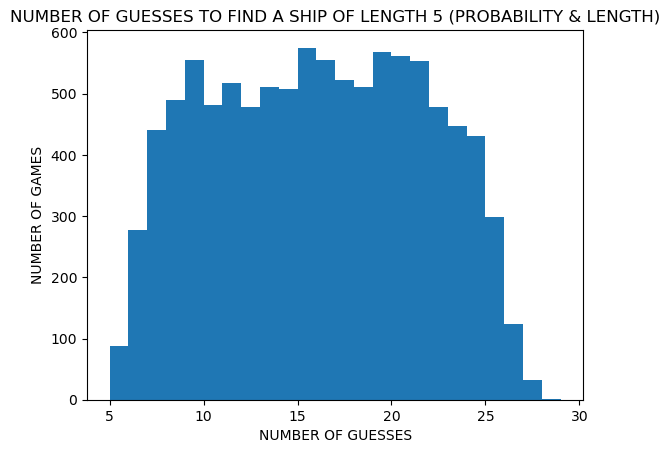

In [11]:
# GENERATING A HISTOGRAM TO VISUALIZE THE DATA ON HOW MANY GUESSES IT TAKES GIVEN THIS NEW STRATEGY
plt.hist(guesses, bins = len(set(guesses)))
plt.title("NUMBER OF GUESSES TO FIND A SHIP OF LENGTH 5 (PROBABILITY & LENGTH)")
plt.xlabel("NUMBER OF GUESSES")
plt.ylabel("NUMBER OF GAMES")
plt.show()

**AS YOU CAN SEE, THE NUMBER OF GUESSES IS UPPER-BOUNDED AT 27-29, COMPARED TO THE PROBABILITY STRATEGY WHERE THE UPPER BOUND COULD BE AS MUCH AS 44 (A SIGNIFICANT IMPROVEMENT)!**